# Support Vector Machines

-Support Vector Classifier

-Support Vector Machine

-ROC Curves

-SVM with Multiple Classes

-Application to Gene Expression Data

In [1]:
# load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

###  Support Vector Classifier

Define a function to plot a classifier with support vectors.

In [2]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [16]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

In [17]:
X

array([[ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-1.19276461, -0.20487651],
       [-0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751],
       [-0.98060789, -0.85685315],
       [-0.87187918, -0.42250793],
       [ 0.99643983,  0.71242127],
       [ 0.05914424, -0.36331088],
       [ 0.00328884, -0.10593044],
       [ 0.79305332, -0.63157163],
       [-0.00619491, -0.10106761],
       [-0.05230815,  0.24921766],
       [ 0.19766009,  1.33484857],
       [-0.08687561,  1.56153229]])

In [18]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

Text(0,0.5,'X2')

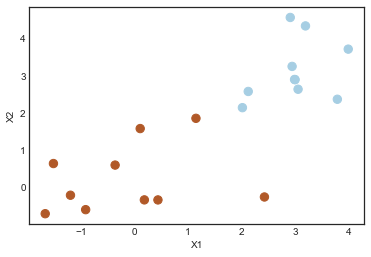

In [25]:
X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

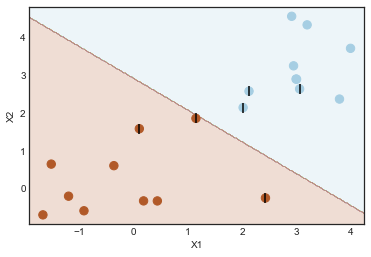

Number of support vectors:  6


In [26]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 0.1, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

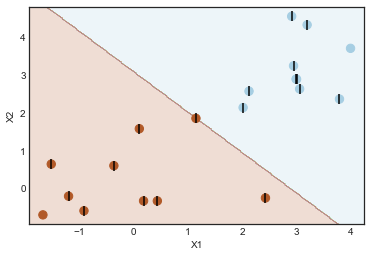

Number of support vectors:  18


In [34]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.01, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [28]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.0003989 , 0.00029449, 0.00059838, 0.00029917, 0.000296  ,
        0.00039999, 0.00029912]),
 'mean_score_time': array([3.98564339e-04, 9.96112823e-05, 9.95635986e-05, 1.99151039e-04,
        1.99222565e-04, 9.97066498e-05, 3.99160385e-04]),
 'mean_test_score': array([0.95, 0.95, 0.95, 0.9 , 0.9 , 0.9 , 0.9 ]),
 'mean_train_score': array([0.95555556, 0.97777778, 0.99444444, 1.        , 1.        ,
        1.        , 1.        ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4]),
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split0_train_score': array([0.94444444, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 'split1_tes

In [29]:
# 0.001 is best according to GridSearchCV. 
clf.best_params_

{'C': 0.001}

In [41]:
# Generating test data
np.random.seed(5)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)

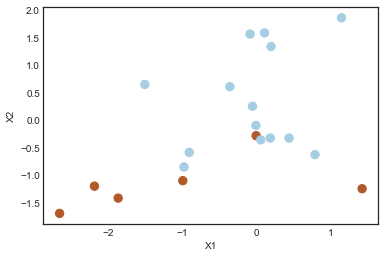

In [42]:
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [43]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

,-1,1
-1,0,14
1,0,6


In [47]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)
# The misclassification is the same

,-1,1
-1,1,13
1,0,6


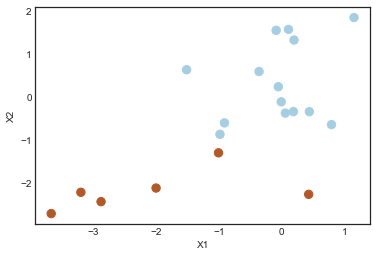

In [45]:
# Changing the test data so that the classes are really seperable with a hyperplane.
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [46]:
svc3 = SVC(C=0.1, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,0,14
1,0,6


In [48]:
svc4 = SVC(C=10, kernel='linear')
svc4.fit(X_test, y_test)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

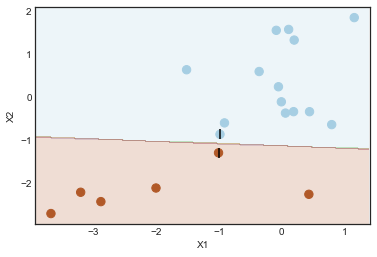

Number of support vectors:  2


In [49]:
plot_svc(svc4, X_test, y_test)

In [50]:
# Increase the margin. Now there is one misclassification: increased bias, lower variance.
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

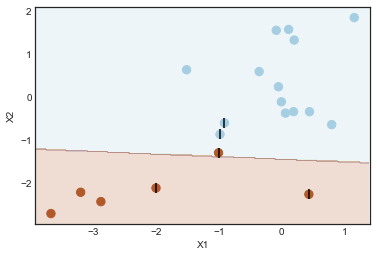

Number of support vectors:  5


In [51]:
plot_svc(svc5, X_test, y_test)

### Support Vector Machine 

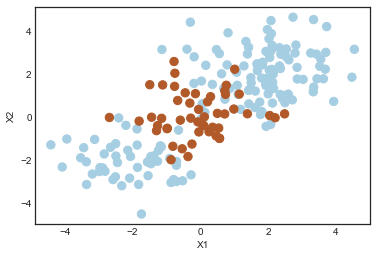

In [53]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [74]:
svm = SVC(C=50, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

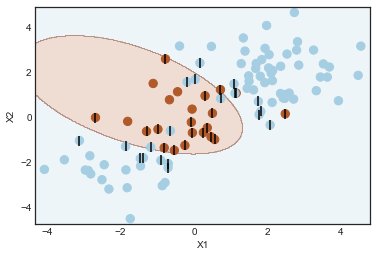

Number of support vectors:  37


In [75]:
plot_svc(svm, X_train, y_train)

In [76]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=10)
svm2.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

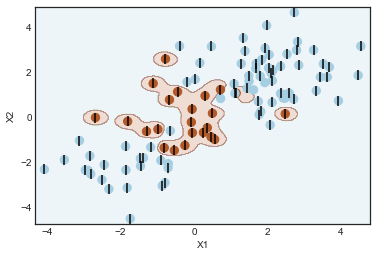

Number of support vectors:  91


In [77]:
plot_svc(svm2, X_train, y_train)

In [78]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.000599  , 0.00079815, 0.00059829, 0.00039907, 0.00059841,
        0.00070486, 0.00048847, 0.00039902, 0.00059454, 0.00059845,
        0.00069833, 0.00049884, 0.00060124, 0.0007987 , 0.00050223,
        0.00059862, 0.00050533, 0.00039873, 0.00059817, 0.00069821,
        0.00059819, 0.00059855, 0.00059507, 0.00069783, 0.00089748]),
 'mean_score_time': array([1.99055672e-04, 9.96828079e-05, 3.98492813e-04, 4.98461723e-04,
        9.96589661e-05, 2.91180611e-04, 9.98497009e-05, 9.64164734e-05,
        9.98497009e-05, 9.97543335e-05, 0.00000000e+00, 2.99191475e-04,
        2.99239159e-04, 1.99365616e-04, 1.99437141e-04, 9.97066498e-05,
        1.96146965e-04, 3.98564339e-04, 9.97066498e-05, 0.00000000e+00,
        0.00000000e+00, 9.97066498e-05, 2.99119949e-04, 4.99296188e-04,
        2.99239159e-04]),
 'mean_test_score': array([0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.92,
        0.92, 0.9 , 0.88, 0.85, 0.92, 0.89, 0.86, 0.86, 0.87, 0.84, 0.8

In [79]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [80]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[67,  6],
       [ 9, 18]], dtype=int64)

In [81]:
# 15% of test observations misclassified
clf.best_estimator_.score(X_test, y_test)

0.85

In [82]:
(67+18)/(67+18+6+9)

0.85

### 9.6.3 ROC Curves

Comparing the ROC curves of two models on train/test data. One model is more flexible than the other.

In [83]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)
y_train_score4

array([-1.00005068, -1.00003048, -1.00002921,  0.32449414, -0.9999977 ,
       -0.61798916, -0.99986435, -0.99999817, -1.00014603,  0.33727588,
       -0.99994621, -0.99986071, -0.99996963,  0.62844624, -1.00003048,
        0.32447891,  0.32968303, -1.00002879,  0.32465037, -1.00019936,
       -1.00005068, -0.99996339, -0.99973712, -1.00005801, -1.00000251,
       -0.9996642 ,  0.32449423, -1.00002965, -1.00048598, -0.9995249 ,
       -0.99957705, -1.00002541, -0.99999086, -1.00007233, -1.00000156,
       -1.00048218, -1.00005801, -0.99995885, -0.99989643, -1.00010729,
       -1.00003001,  0.32449414, -1.00001397, -1.00049939,  0.38574452,
       -0.99983581, -1.00015022, -0.99955696, -1.00002522, -1.00002921,
       -1.00002664,  0.41525478, -0.99986071,  0.32449414,  0.33568373,
       -1.00001397, -0.99996339, -0.99998363,  0.64705264, -1.00041714,
       -0.99987535, -0.99953788, -0.73343763,  0.32464962, -0.99987139,
        0.32426069, -0.99983395, -1.00002879, -1.00002664, -0.99

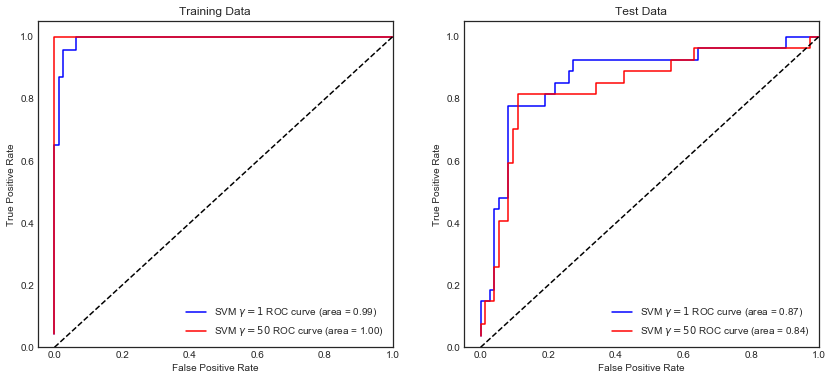

In [86]:
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

As expected, the more flexible model scores better on training data but worse on the test data.

### 9.6.4 SVM with Multiple Classes

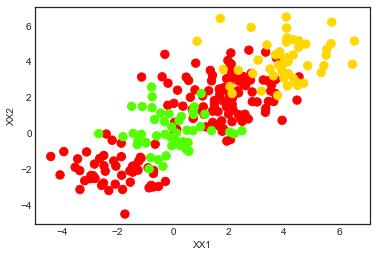

In [87]:
# Adding a third class of observations
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [88]:
svm5 = SVC(C=0.2, kernel='rbf',gamma=0.1)
svm5.fit(XX, yy)

SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

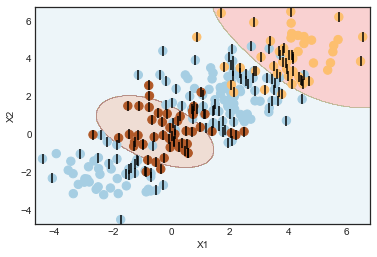

Number of support vectors:  172


In [89]:
plot_svc(svm5, XX, yy)

In [90]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.001,0.005,0.01,0.05,0.09,0.1,0.2,0.5,1,3,5,10,20,50,70,100],
                     'gamma': [0.001,0.005,0.01,0.05,0.09,0.1,0.2,0.5,1,3,5,10,20,50,70,100]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(XX, yy)
clf.cv_results_

{'mean_fit_time': array([0.00199525, 0.00159903, 0.0013962 , 0.00099733, 0.00159578,
        0.00179524, 0.00139613, 0.00149615, 0.00119696, 0.00110343,
        0.00139251, 0.00139658, 0.00159576, 0.00199454, 0.00329087,
        0.00259316, 0.00119648, 0.00099721, 0.00179462, 0.001596  ,
        0.00109723, 0.0010973 , 0.00099764, 0.0017956 , 0.00139568,
        0.00169587, 0.00189459, 0.00200167, 0.00339074, 0.00339053,
        0.00379319, 0.00419192, 0.0015995 , 0.00170124, 0.001197  ,
        0.00109527, 0.00119712, 0.00129695, 0.00189455, 0.00129659,
        0.00159576, 0.00169559, 0.00189483, 0.00229354, 0.00269232,
        0.00349112, 0.00438874, 0.00399191, 0.00194609, 0.00149584,
        0.00149612, 0.00124829, 0.00109735, 0.00159523, 0.00129676,
        0.00159619, 0.00179529, 0.00219104, 0.00278888, 0.00269256,
        0.00319109, 0.00428846, 0.00398889, 0.00508621, 0.00129669,
        0.00169528, 0.00120001, 0.0016959 , 0.00099719, 0.00159564,
        0.00139625, 0.00169487,

In [91]:
clf.best_params_

{'C': 0.2, 'gamma': 0.1}

In [92]:
clf.best_score_

0.856

### Application to Gene Expression Data

In [241]:
X_train = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
X_test = pd.read_csv('Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()

In [243]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
0,0.139501,-1.168927,0.564973,-3.366796,-1.323132,-0.692547,2.327395,0.923703,0.112167,0.509765,...,-0.180803,-0.942635,-1.210662,-0.588787,-0.070422,-2.783852,-2.840439,-1.160913,-0.343054,-0.055513
1,1.164275,-2.018158,1.103533,-2.165435,-1.440117,-0.437420,2.661587,1.224011,0.210504,1.045563,...,-0.709480,-1.532940,-2.385967,-0.389641,0.422781,-2.816750,-2.422495,-1.722607,-1.703749,-1.699910
2,0.841093,0.254720,-0.208748,-2.148149,-1.512765,-1.263723,2.946642,0.087828,0.482920,1.063020,...,-0.067958,-1.854060,-1.541312,-1.773723,-1.879935,-2.265289,-2.405726,-0.176379,-0.128743,-0.996417
3,0.685065,-1.927579,-0.233068,-1.640413,-1.008954,0.774451,1.617168,-0.567925,0.036621,-0.101701,...,1.077559,-0.263966,-1.966113,-1.086190,0.885914,-0.248590,0.385874,-0.508163,-0.626985,-0.699366
4,-1.956163,-2.234926,0.281563,-2.695628,-1.214697,-1.059872,2.498070,0.780196,1.041583,0.727500,...,-1.209320,-0.693147,-1.846427,-0.993442,-3.294138,-3.332605,-2.282782,-0.656622,-2.012157,-1.668657
5,-0.258641,-1.684700,0.175800,-2.323809,-1.692276,-0.008637,2.302135,0.455778,-0.342490,0.716522,...,-2.049494,-1.223835,-1.140372,-0.952436,0.294012,-1.205307,-1.457576,-0.655081,-0.060493,-0.980563
6,-1.109875,-1.046969,-0.853786,-2.607752,-1.770781,-1.259133,1.426380,-0.743599,0.613129,-0.533071,...,-0.963120,-1.016940,-0.991553,-0.643405,-2.323809,-1.435485,-0.484995,0.479335,-1.006489,-0.778487
7,1.471485,-1.751578,-0.256700,-1.899122,-1.364924,-1.198654,2.489878,-0.035006,0.833474,0.779279,...,-0.000900,-1.020263,-1.599488,-2.273998,-0.559141,-1.985587,-1.044124,-1.064211,-1.179605,-0.499556
8,-0.396159,-1.191386,0.696691,-1.862397,-1.312672,0.744980,1.762708,1.034038,0.802943,0.953471,...,-1.104429,-0.955811,-0.438505,-0.845366,-0.372659,0.059118,-1.209320,-0.220148,0.452031,-1.119325
9,-2.136224,-2.236797,-0.946492,-2.777400,-1.822631,-0.455233,2.547514,-0.270366,1.437866,0.543777,...,-1.552585,-0.649513,-1.159318,-0.809456,-2.993734,-2.431555,-0.589148,-0.790319,-0.536485,-1.935168


In [244]:
# y_train counts
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [245]:
# y_test counts
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [246]:
# This model gives identical results to the svm() of the R package e1071, also based on libsvm library.
svc = SVC(kernel='linear')

# This model is based on liblinear library and gives 100 score on the test data. 
#svc = LinearSVC()

svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [258]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm.T

array([[ 8,  0,  0,  0],
       [ 0, 23,  0,  0],
       [ 0,  0, 12,  0],
       [ 0,  0,  0, 20]], dtype=int64)

In [262]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [263]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5
